# Project Name - OLA _RIDE_ANALYSIS

## Project Type - EDA

Contribution - Individual

Import Libraries

In [1]:
import pandas as pd
import numpy as np      
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Dataset Loading

In [2]:
df=pd.read_excel('/Users/pritidwivedi/Downloads/OLA_DataSet.xlsx')

In [3]:
df.head()

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,Canceled_Rides_by_Customer,Canceled_Rides_by_Driver,Incomplete_Rides,Incomplete_Rides_Reason,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating,Vehicle Images
0,2024-07-26 14:00:00,14:00:00,CNR7153255142,Canceled by Driver,CID713523,Prime Sedan,Tumkur Road,RT Nagar,NaN,NaN,NaN,Personal & Car related issue,NaN,NaN,444,NaN,0,NaN,NaN,https://cdn-icons-png.flaticon.com/128/14183/1...
1,2024-07-25 22:20:00,22:20:00,CNR2940424040,Success,CID225428,Bike,Magadi Road,Varthur,203.0,30.0,NaN,NaN,No,NaN,158,Cash,13,4.1,4.0,https://cdn-icons-png.flaticon.com/128/9983/99...
2,2024-07-30 19:59:00,19:59:00,CNR2982357879,Success,CID270156,Prime SUV,Sahakar Nagar,Varthur,238.0,130.0,NaN,NaN,No,NaN,386,UPI,40,4.2,4.8,https://cdn-icons-png.flaticon.com/128/9983/99...
3,2024-07-22 03:15:00,03:15:00,CNR2395710036,Canceled by Customer,CID581320,eBike,HSR Layout,Vijayanagar,NaN,NaN,Driver is not moving towards pickup location,NaN,NaN,NaN,384,NaN,0,NaN,NaN,https://cdn-icons-png.flaticon.com/128/6839/68...
4,2024-07-02 09:02:00,09:02:00,CNR1797421769,Success,CID939555,Mini,Rajajinagar,Chamarajpet,252.0,80.0,NaN,NaN,No,NaN,822,Credit Card,45,4.0,3.0,https://cdn-icons-png.flaticon.com/128/3202/32...


In [4]:
df.shape

(103024, 20)

In [5]:
df.isnull().sum()

Date                              0
Time                              0
Booking_ID                        0
Booking_Status                    0
Customer_ID                       0
Vehicle_Type                      0
Pickup_Location                   0
Drop_Location                     0
V_TAT                         39057
C_TAT                         39057
Canceled_Rides_by_Customer    92525
Canceled_Rides_by_Driver      84590
Incomplete_Rides              39057
Incomplete_Rides_Reason       99098
Booking_Value                     0
Payment_Method                39057
Ride_Distance                     0
Driver_Ratings                39057
Customer_Rating               39057
Vehicle Images                    0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.drop(["Vehicle Images","Time"], axis=1, inplace=True)

In [8]:
df.head()

,Date,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,Canceled_Rides_by_Customer,Canceled_Rides_by_Driver,Incomplete_Rides,Incomplete_Rides_Reason,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating
0,2024-07-26 14:00:00,CNR7153255142,Canceled by Driver,CID713523,Prime Sedan,Tumkur Road,RT Nagar,NaN,NaN,NaN,Personal & Car related issue,NaN,NaN,444,NaN,0,NaN,NaN
1,2024-07-25 22:20:00,CNR2940424040,Success,CID225428,Bike,Magadi Road,Varthur,203.0,30.0,NaN,NaN,No,NaN,158,Cash,13,4.1,4.0
2,2024-07-30 19:59:00,CNR2982357879,Success,CID270156,Prime SUV,Sahakar Nagar,Varthur,238.0,130.0,NaN,NaN,No,NaN,386,UPI,40,4.2,4.8
3,2024-07-22 03:15:00,CNR2395710036,Canceled by Customer,CID581320,eBike,HSR Layout,Vijayanagar,NaN,NaN,Driver is not moving towards pickup location,NaN,NaN,NaN,384,NaN,0,NaN,NaN
4,2024-07-02 09:02:00,CNR1797421769,Success,CID939555,Mini,Rajajinagar,Chamarajpet,252.0,80.0,NaN,NaN,No,NaN,822,Credit Card,45,4.0,3.0


In [9]:
df["C_TAT"].unique()

array([ nan,  30., 130.,  80.,  90.,  40.,  55.,  95.,  35.,  70.,  25.,
        65., 145., 105.,  50.,  60.,  85., 140.,  45., 120., 110., 135.,
       115., 100.,  75., 125.])

In [10]:
df.fillna({"C_TAT": df["C_TAT"].mean()}, inplace=True)

In [11]:
df["V_TAT"].unique()

array([ nan, 203., 238., 252., 231., 133.,  35., 126.,  70., 140.,  42.,
       245.,  84., 168.,  56., 175., 189.,  49.,  77., 210., 287., 294.,
       266., 217., 308.,  63.,  91., 196., 224., 280., 301., 161., 154.,
       182., 259., 105.,  98., 147., 119., 273., 112.])

In [12]:
df.fillna({"V_TAT": df["V_TAT"].mean()}, inplace=True)

In [13]:
a=df.groupby(['Booking_Status'])['Payment_Method'].apply(lambda x:x.isnull().sum())
a


Booking_Status
Canceled by Customer    10499
Canceled by Driver      18434
Driver Not Found        10124
Success                     0
Name: Payment_Method, dtype: int64

In [14]:
df["Payment_Method"] = df["Payment_Method"].fillna(df["Booking_Status"].map({
    "Canceled by Driver": "Not Applicable",
    "Canceled by Customer": "Not Applicable",
    "Driver Not Found": "Not Applicable"
}))

In [15]:
df[["Driver_Ratings","Customer_Rating", "Incomplete_Rides","Canceled_Rides_by_Driver", "Canceled_Rides_by_Customer", "Incomplete_Rides_Reason"]]=df[["Driver_Ratings","Customer_Rating", "Incomplete_Rides","Canceled_Rides_by_Driver", "Canceled_Rides_by_Customer", "Incomplete_Rides_Reason"]].fillna("Not Applicable")

In [16]:
df.isnull().sum()

Date                          0
Booking_ID                    0
Booking_Status                0
Customer_ID                   0
Vehicle_Type                  0
Pickup_Location               0
Drop_Location                 0
V_TAT                         0
C_TAT                         0
Canceled_Rides_by_Customer    0
Canceled_Rides_by_Driver      0
Incomplete_Rides              0
Incomplete_Rides_Reason       0
Booking_Value                 0
Payment_Method                0
Ride_Distance                 0
Driver_Ratings                0
Customer_Rating               0
dtype: int64

# Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between 

## Univariate Analysis

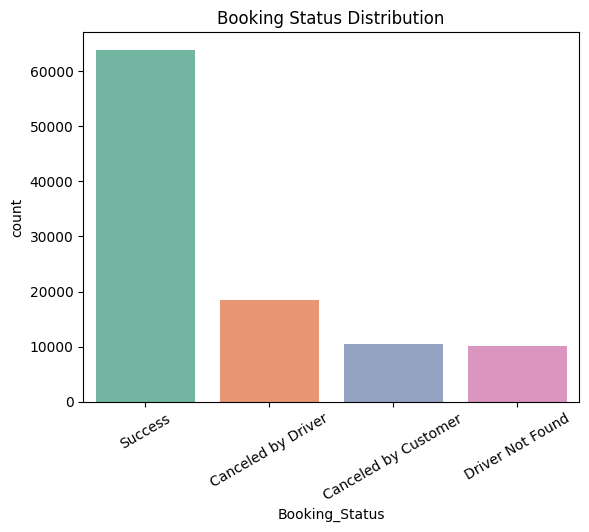

In [24]:
plt.figure()
sns.countplot(data=df, x="Booking_Status",
              order=df["Booking_Status"].value_counts().index, palette="Set2")
plt.title("Booking Status Distribution")
plt.xticks(rotation=30)
plt.show()

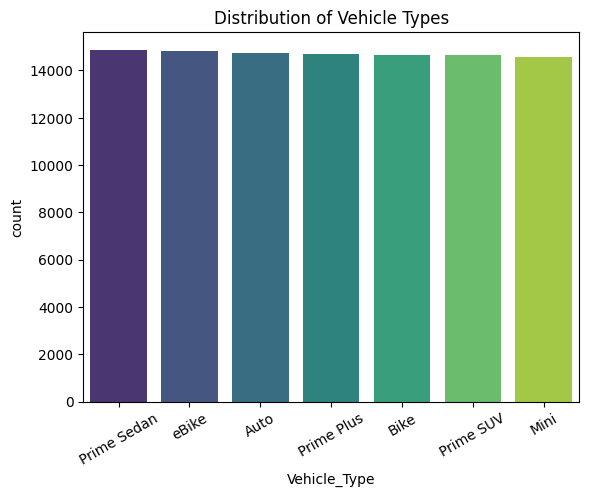

In [25]:
plt.figure()
sns.countplot(data=df, x="Vehicle_Type",
              order=df["Vehicle_Type"].value_counts().index, palette="viridis")
plt.title("Distribution of Vehicle Types")
plt.xticks(rotation=30)
plt.show()

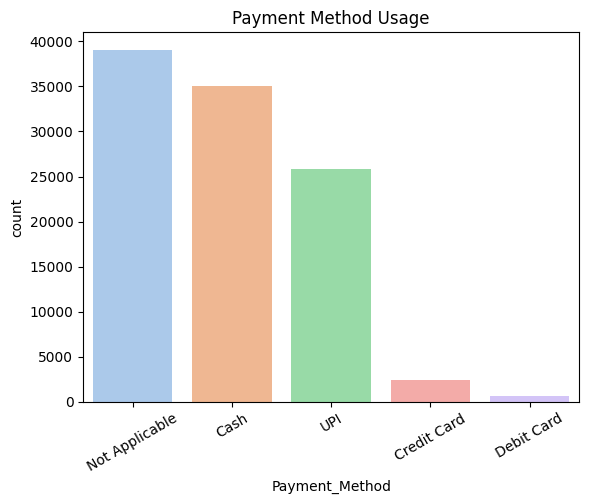

In [26]:
plt.figure()
sns.countplot(data=df, x="Payment_Method",
              order=df["Payment_Method"].value_counts().index, palette="pastel")
plt.title("Payment Method Usage")
plt.xticks(rotation=30)
plt.show()


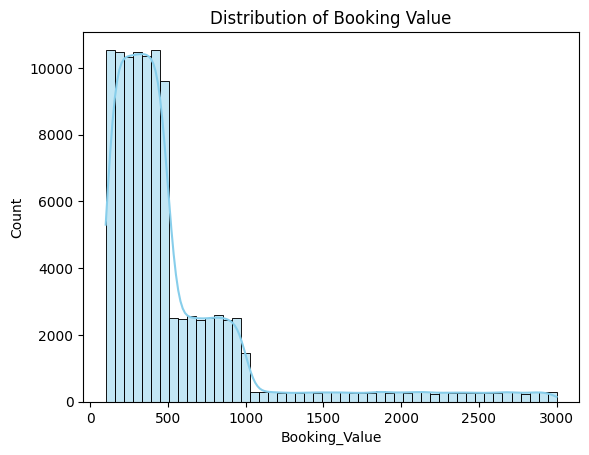

In [27]:
plt.figure()
sns.histplot(df["Booking_Value"], bins=50, kde=True, color="skyblue")
plt.title("Distribution of Booking Value")
plt.show()

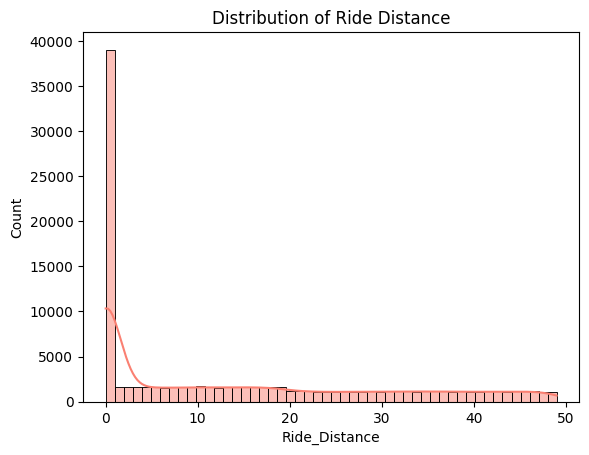

In [28]:
plt.figure()
sns.histplot(df["Ride_Distance"], bins=50, kde=True, color="salmon")
plt.title("Distribution of Ride Distance")
plt.show()

🔹 Univariate Analysis

1. Booking Status

The booking status distribution shows that successful rides dominate, but a significant portion are cancellations. Both customer and driver cancellations are present.

👉 Interpretation: While Ola is fulfilling most demand, cancellations highlight areas to improve — e.g., better driver allocation or more transparent communication to customers.

2. Vehicle Type

The vehicle type distribution is skewed toward affordable, quick options like Bikes, Minis, and Autos. Higher-end categories like SUVs or Prime Sedans occur far less often.

👉 Interpretation: Ola is used primarily for daily, cost-effective mobility, rather than luxury or long-distance rides.

3. Payment Method

Payment methods show that UPI and Cash dominate, while cards and wallets form a smaller fraction.
👉 Interpretation: Ola’s customer base is digitally active, but cash still has a strong hold — important for planning promotions and wallet incentives.

4. Booking Value

Booking value distribution is right-skewed:

Most rides fall into a low-to-mid value range.

Few high-value rides exist, creating a long tail.

👉 Interpretation: Customers mainly book short, inexpensive trips, reinforcing Ola’s role as a daily commute solution rather than a premium service.

5. Ride Distance

Ride distance is also right-skewed:

Most rides are short trips, with a steep drop-off for longer rides.

👉 Interpretation: Ola caters to urban, local mobility, not intercity travel. This aligns with the high volume of low-value bookings.



# Bivariate Analysis

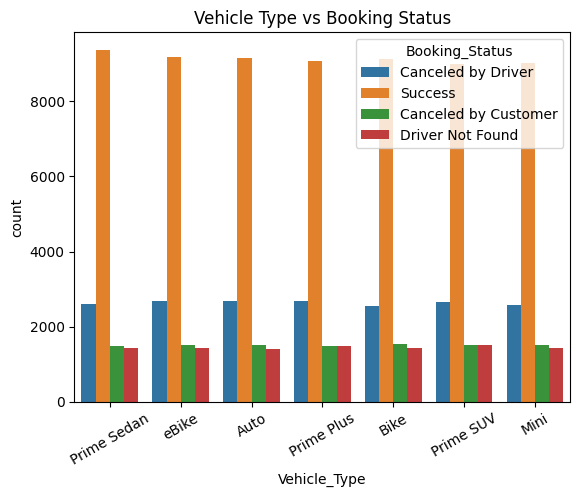

In [23]:
# Vehicle Type vs Booking Status
plt.figure()
sns.countplot(data=df, x="Vehicle_Type", hue="Booking_Status",
              order=df["Vehicle_Type"].value_counts().index)
plt.title("Vehicle Type vs Booking Status")
plt.xticks(rotation=30)
plt.show()

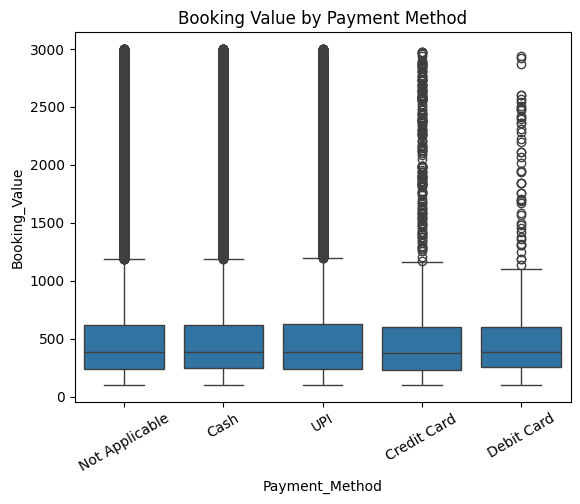

In [29]:
# Booking Value vs Payment Method
plt.figure()
sns.boxplot(data=df, x="Payment_Method", y="Booking_Value")
plt.title("Booking Value by Payment Method")
plt.xticks(rotation=30)
plt.show()

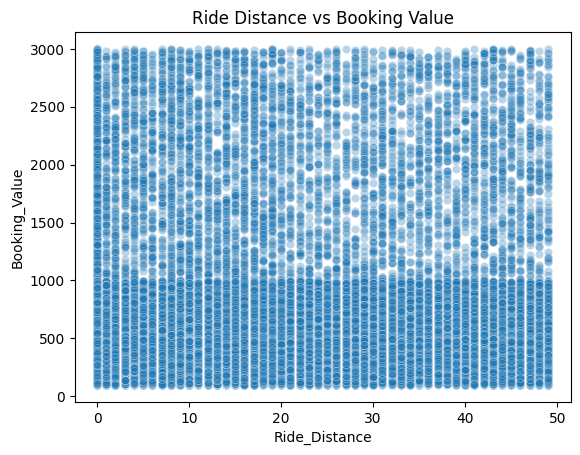

In [30]:
# Ride Distance vs Booking Value
plt.figure()
sns.scatterplot(data=df, x="Ride_Distance", y="Booking_Value", alpha=0.3)
plt.title("Ride Distance vs Booking Value")
plt.show()


🔹 Bivariate Analysis

1. Vehicle Type vs. Booking Status

Smaller, cheaper rides (Bikes, Autos) have higher success rates, while larger vehicles show relatively more cancellations.

👉 Interpretation: Premium vehicle customers may have stricter expectations, leading to more cancellations when conditions aren’t met.

2. Booking Value vs. Payment Method

High-value bookings are more common with digital payments (UPI, cards).

Cash payments dominate lower-value bookings.

👉 Interpretation: Frequent commuters prefer cash, while serious / premium riders rely on digital — key for Ola’s pricing and loyalty programs.

3. Ride Distance vs. Booking Value

A clear positive correlation: as distance increases, so does the booking value. However, outliers exist — rides with long distances but unexpectedly low/high fares.

👉 Interpretation: Pricing works as expected but may need adjustment for edge cases (e.g., discounts or surge pricing anomalies).



In [33]:
df.to_excel('/Users/pritidwivedi/Downloads/OLA_Cleaned.xlsx', index=False)